<a href="https://colab.research.google.com/github/bnsreenu/python_for_microscopists/blob/master/371_Advanced_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/xKWPe9jxPG8

# Advanced Dimensionality Reduction: t-SNE and UMAP Tutorial

## Overview
This tutorial explores two powerful non-linear dimensionality reduction techniques: **t-SNE** and **UMAP**. We compare them against **PCA** as a baseline to understand their strengths, limitations, and optimal use cases.

## What is t-SNE?
**t-Distributed Stochastic Neighbor Embedding (t-SNE)** is a non-linear dimensionality reduction technique designed for visualization.

### How t-SNE Works:
1. **High-dimensional similarities**: Calculates probability distributions of pairwise similarities in original space
2. **Low-dimensional similarities**: Creates similar probability distributions in 2D/3D space  
3. **Optimization**: Minimizes the difference between these distributions using gradient descent
4. **Result**: Points that are similar in high dimensions stay close in low dimensions

### Key Parameters:
- **Perplexity (5-50)**: Controls balance between local and global structure
  - Low values: Focus on local neighborhoods, may create artificial clusters
  - High values: Consider more global structure, may miss local patterns
- **Learning rate (10-1000)**: Controls optimization step size
- **Iterations (≥1000)**: Number of optimization steps

### t-SNE Strengths:
- Excellent for cluster visualization
- Preserves local neighborhood structure  
- Reveals non-linear patterns
- Great for exploratory data analysis

### t-SNE Limitations:
- Computationally expensive (slow for large datasets)
- Parameter sensitive (requires tuning)
- No inverse transform (can't map new points)
- May create artificial clusters if over-tuned
- Global distances may be distorted

---

## What is UMAP?
**Uniform Manifold Approximation and Projection (UMAP)** is a newer technique that balances local and global structure preservation.

### How UMAP Works:
1. **Neighborhood graphs**: Builds weighted graphs of nearest neighbors in high-dimensional space
2. **Topological structure**: Uses mathematical topology to understand data manifold
3. **Low-dimensional embedding**: Creates similar graph structure in low dimensions
4. **Cross-entropy optimization**: More stable optimization than t-SNE's approach

### Key Parameters:
- **n_neighbors (5-100)**: Size of local neighborhood to consider
  - Low values: More local focus, detailed cluster structure
  - High values: More global focus, smoother embeddings
- **min_dist (0.0-1.0)**: Minimum distance between points in embedding
  - Low values: Tighter clusters, more detail
  - High values: More spread out, better global structure

### UMAP Strengths:
- Preserves both local AND global structure
- Faster than t-SNE, scales to larger datasets
- More stable and reproducible results
- Supports inverse transform (can embed new data)
- Better theoretical foundation

### UMAP Limitations:
- Newer method, less established than t-SNE
- Still requires parameter tuning
- May not create as visually striking clusters as t-SNE

---

## Method Comparison Summary

| Aspect | PCA | t-SNE | UMAP |
|--------|-----|-------|------|
| **Speed** | Very Fast (< 1s) | Slow (5-20s) | Moderate (10-30s) |
| **Structure Preserved** | Global (linear) | Local (non-linear) | Local + Global |
| **Deterministic** | Yes | No | Mostly |
| **New Data** | Yes | No | Yes |
| **Best For** | Quick exploration | Cluster visualization | Balanced analysis |
| **Parameter Sensitivity** | Low | High | Moderate |

---

## When to Use Each Method

### Use PCA When:
- Need fast, deterministic results
- Linear relationships are sufficient  
- Interpretability is crucial
- Preprocessing for other ML algorithms

### Use t-SNE When:
- Cluster visualization is primary goal
- Local structure is most important
- Small to medium datasets (<10,000 points)
- Publication-quality visualizations needed

### Use UMAP When:
- Need both local and global structure
- Working with larger datasets
- Want to embed new data points
- Need stable, reproducible results
- Production ML pipelines

---

## Dataset
We'll use the **Breast Cancer Wisconsin dataset**:
- 569 samples, 30 features
- Binary classification (malignant vs benign)
- High-dimensional with good cluster structure
- Perfect for demonstrating dimensionality reduction techniques

# 1: Setup and Data Preparation

### Imports

Import libraries (t-SNE, UMAP, sklearn) and setup visualization parameters

What you will see: Dataset loaded with 569 samples and 30 features, two classes (malignant/benign), and features successfully standardized for analysis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.stats import mode
import time
import warnings

# Install UMAP if not available
try:
    import umap
except ImportError:
    print("Installing UMAP...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "umap-learn"])
    import umap

from sklearn.manifold import TSNE

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

print("Advanced Dimensionality Reduction: t-SNE and UMAP Tutorial")
print("=" * 60)

# Load breast cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
feature_names = breast_cancer.feature_names
target_names = breast_cancer.target_names

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Dataset: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Classes: {target_names[0]} (0), {target_names[1]} (1)")
print(f" Features standardized")

Advanced Dimensionality Reduction: t-SNE and UMAP Tutorial
Dataset: 569 samples, 30 features
Classes: malignant (0), benign (1)
 Features standardized


### Create PCA baseline with clustering metrics for comparison

What you will see: PCA captures 63.2% variance in 2D, achieves 0.508 silhouette score and 90.7% clustering accuracy, establishing baseline performance metrics.

In [ ]:
# Create PCA baseline for comparison
print("Applying PCA...")
start_time = time.time()
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
pca_time = time.time() - start_time

# PCA clustering metrics
kmeans_pca = KMeans(n_clusters=2, random_state=42, n_init=10)
pca_clusters = kmeans_pca.fit_predict(X_pca)
pca_silhouette = silhouette_score(X_pca, pca_clusters)

# Calculate PCA clustering accuracy
cluster_0_labels = y[pca_clusters == 0]
if len(cluster_0_labels) > 0:
    cluster_0_mode = mode(cluster_0_labels, keepdims=False)[0]
    pca_accuracy = np.mean((pca_clusters == 0) == (y == cluster_0_mode))
else:
    pca_accuracy = 0.5

print(f"PCA Baseline:")
print(f"  Variance explained: {sum(pca.explained_variance_ratio_)*100:.1f}%")
print(f"  Silhouette score: {pca_silhouette:.3f}")
print(f"  Clustering accuracy: {pca_accuracy:.3f}")
print(f"  Computation time: {pca_time:.3f}s")

# Store PCA results for comparison
pca_results = {
    'embedding': X_pca,
    'silhouette_score': pca_silhouette,
    'clustering_accuracy': pca_accuracy,
    'clusters': pca_clusters,
    'computation_time': pca_time
}

Applying PCA...
PCA Baseline:
  Variance explained: 63.2%
  Silhouette score: 0.508
  Clustering accuracy: 0.907
  Computation time: 0.071s


## 2. t-SNE Implementation

### Apply basic t-SNE with default parameters

What you will see: t-SNE completes in 6 seconds, slower than PCA but ready for clustering analysis.

In [ ]:
print("\n" + "=" * 40)
print("t-SNE IMPLEMENTATION")
print("=" * 40)

# Apply basic t-SNE
print("Applying t-SNE with default parameters...")
start_time = time.time()
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200,
            n_iter=1000, random_state=42, verbose=0)
X_tsne = tsne.fit_transform(X_scaled)
tsne_time = time.time() - start_time

print(f"t-SNE completed in {tsne_time:.1f} seconds")




t-SNE IMPLEMENTATION
Applying t-SNE with default parameters...
t-SNE completed in 4.4 seconds


### Analyze t-SNE clustering performance

What you will see: t-SNE achieves 0.500 silhouette score (similar to PCA) but higher 96.0% clustering accuracy, showing better class separation despite longer computation time.

In [ ]:
# Apply clustering to t-SNE results
kmeans_tsne = KMeans(n_clusters=2, random_state=42, n_init=10)
tsne_clusters = kmeans_tsne.fit_predict(X_tsne)
tsne_silhouette = silhouette_score(X_tsne, tsne_clusters)

# Calculate clustering accuracy
cluster_0_labels = y[tsne_clusters == 0]
if len(cluster_0_labels) > 0:
    cluster_0_mode = mode(cluster_0_labels, keepdims=False)[0]
    tsne_accuracy = np.mean((tsne_clusters == 0) == (y == cluster_0_mode))
else:
    tsne_accuracy = 0.5

print(f"t-SNE Results:")
print(f"  Silhouette score: {tsne_silhouette:.3f}")
print(f"  Clustering accuracy: {tsne_accuracy:.3f}")
print(f"  Computation time: {tsne_time:.1f}s")

# Store t-SNE results
tsne_results = {
    'embedding': X_tsne,
    'silhouette_score': tsne_silhouette,
    'clustering_accuracy': tsne_accuracy,
    'clusters': tsne_clusters,
    'computation_time': tsne_time
}

t-SNE Results:
  Silhouette score: 0.500
  Clustering accuracy: 0.960
  Computation time: 4.4s


### Explore t-SNE perplexity parameter effects

What you will see: Perplexity 50 gives best silhouette score (0.554), while perplexity 15 gives best accuracy (96.1%), showing parameter tuning importance.

In [ ]:
def explore_tsne_perplexity(X_scaled, y, perplexity_values=[5, 15, 30, 50]):
    """Explore different perplexity values."""
    print(f"\nExploring t-SNE Perplexity Effects:")
    perplexity_results = {}

    for perp in perplexity_values:
        print(f"  Testing perplexity = {perp}...", end=" ")

        # Apply t-SNE
        tsne = TSNE(n_components=2, perplexity=perp, learning_rate=200,
                    n_iter=1000, random_state=42, verbose=0)
        X_tsne = tsne.fit_transform(X_scaled)

        # Calculate metrics
        kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(X_tsne)
        silhouette = silhouette_score(X_tsne, clusters)

        # Clustering accuracy
        cluster_0_labels = y[clusters == 0]
        if len(cluster_0_labels) > 0:
            cluster_0_mode = mode(cluster_0_labels, keepdims=False)[0]
            accuracy = np.mean((clusters == 0) == (y == cluster_0_mode))
        else:
            accuracy = 0.5

        print(f"Silhouette: {silhouette:.3f}, Accuracy: {accuracy:.3f}")

        perplexity_results[perp] = {
            'embedding': X_tsne,
            'silhouette_score': silhouette,
            'clustering_accuracy': accuracy,
            'clusters': clusters
        }

    return perplexity_results

# Execute perplexity exploration
perplexity_results = explore_tsne_perplexity(X_scaled, y)


Exploring t-SNE Perplexity Effects:
  Testing perplexity = 5... Silhouette: 0.478, Accuracy: 0.956
  Testing perplexity = 15... Silhouette: 0.514, Accuracy: 0.961
  Testing perplexity = 30... Silhouette: 0.500, Accuracy: 0.960
  Testing perplexity = 50... Silhouette: 0.554, Accuracy: 0.923


### Visualize PCA vs t-SNE comparison

What you will see: t-SNE creates much tighter, more separated clusters than PCA's linear projection, with clearer boundaries between malignant/benign cases.

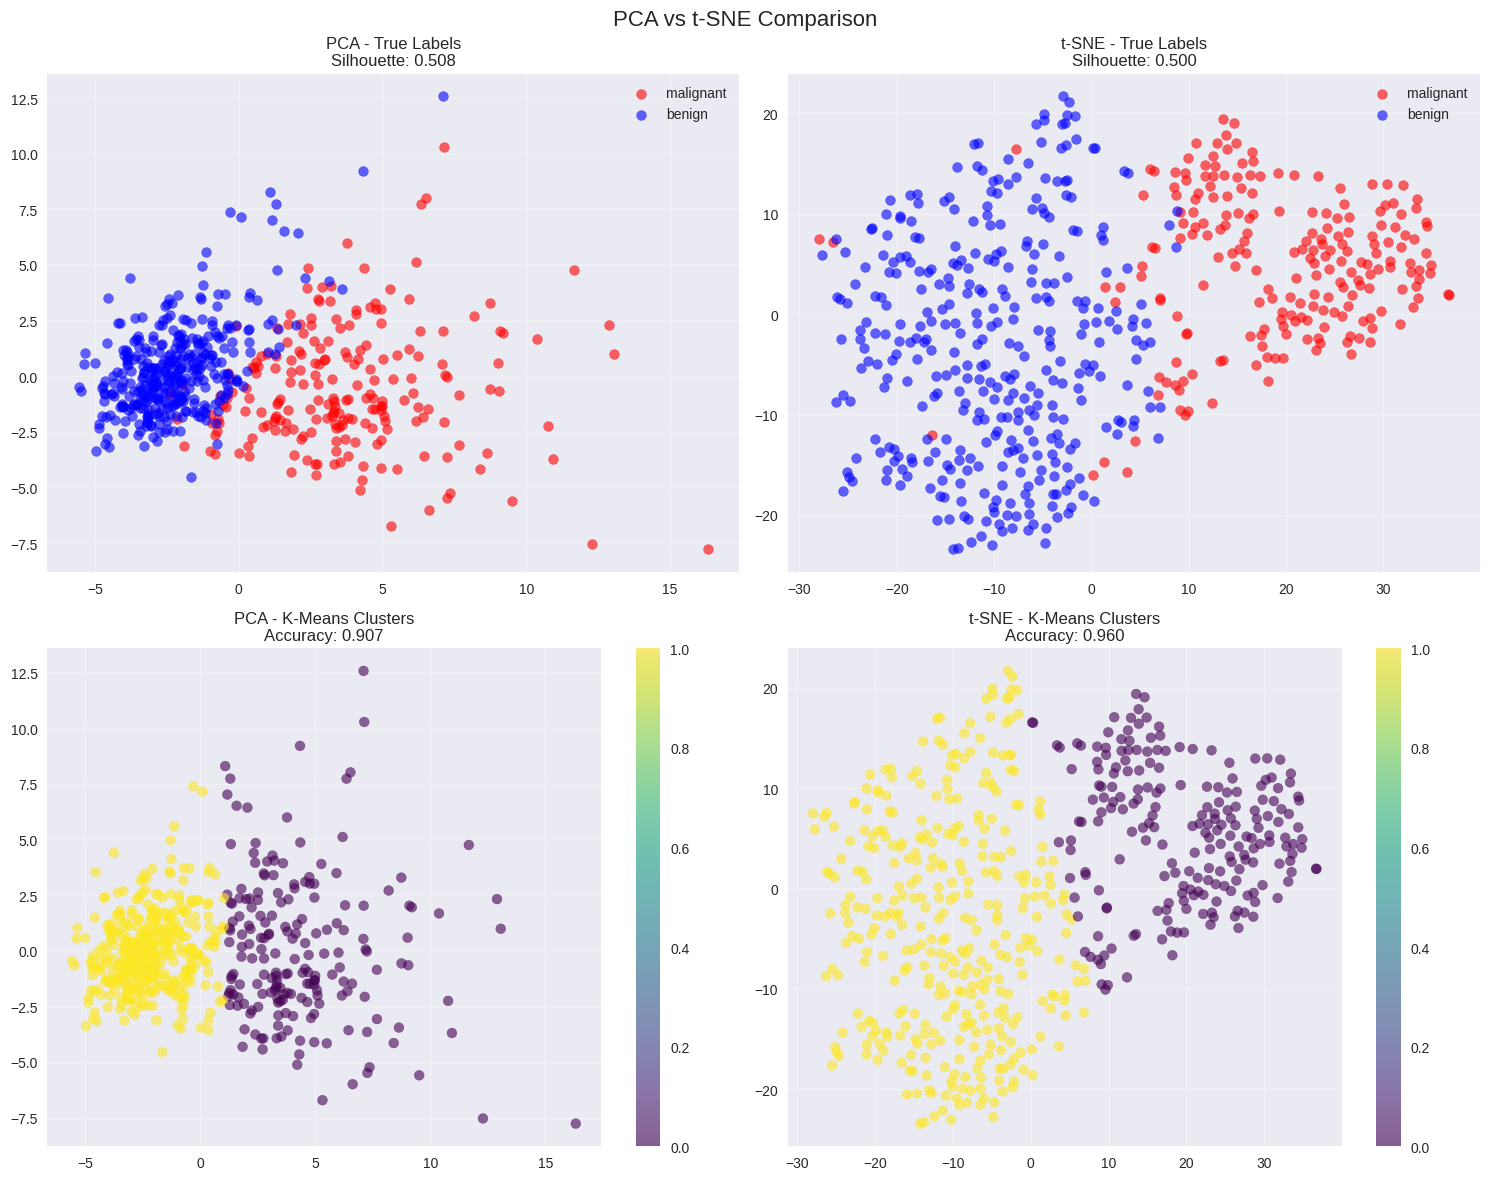

In [ ]:
def visualize_tsne_results(X_pca, X_tsne, y, target_names, pca_results, tsne_results):
    """Compare PCA vs t-SNE visualizations."""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('PCA vs t-SNE Comparison', fontsize=16)

    colors = ['red', 'blue']
    labels = [target_names[0], target_names[1]]

    # PCA - True labels
    for i, (color, label) in enumerate(zip(colors, labels)):
        mask = y == i
        axes[0, 0].scatter(X_pca[mask, 0], X_pca[mask, 1],
                          c=color, alpha=0.6, s=50, label=label)
    axes[0, 0].set_title(f'PCA - True Labels\nSilhouette: {pca_results["silhouette_score"]:.3f}')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # t-SNE - True labels
    for i, (color, label) in enumerate(zip(colors, labels)):
        mask = y == i
        axes[0, 1].scatter(X_tsne[mask, 0], X_tsne[mask, 1],
                          c=color, alpha=0.6, s=50, label=label)
    axes[0, 1].set_title(f't-SNE - True Labels\nSilhouette: {tsne_results["silhouette_score"]:.3f}')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # PCA - Clusters
    scatter1 = axes[1, 0].scatter(X_pca[:, 0], X_pca[:, 1],
                                 c=pca_results['clusters'], cmap='viridis', alpha=0.6, s=50)
    axes[1, 0].set_title(f'PCA - K-Means Clusters\nAccuracy: {pca_results["clustering_accuracy"]:.3f}')
    axes[1, 0].grid(True, alpha=0.3)
    plt.colorbar(scatter1, ax=axes[1, 0])

    # t-SNE - Clusters
    scatter2 = axes[1, 1].scatter(X_tsne[:, 0], X_tsne[:, 1],
                                 c=tsne_results['clusters'], cmap='viridis', alpha=0.6, s=50)
    axes[1, 1].set_title(f't-SNE - K-Means Clusters\nAccuracy: {tsne_results["clustering_accuracy"]:.3f}')
    axes[1, 1].grid(True, alpha=0.3)
    plt.colorbar(scatter2, ax=axes[1, 1])

    plt.tight_layout()
    plt.show()

# Execute visualization
visualize_tsne_results(X_pca, X_tsne, y, target_names, pca_results, tsne_results)

### Visualize how perplexity affects t-SNE results

What you will see: Low perplexity (5) creates fragmented clusters, medium values (15-30) show good separation, high perplexity (50) creates very tight, compact clusters.

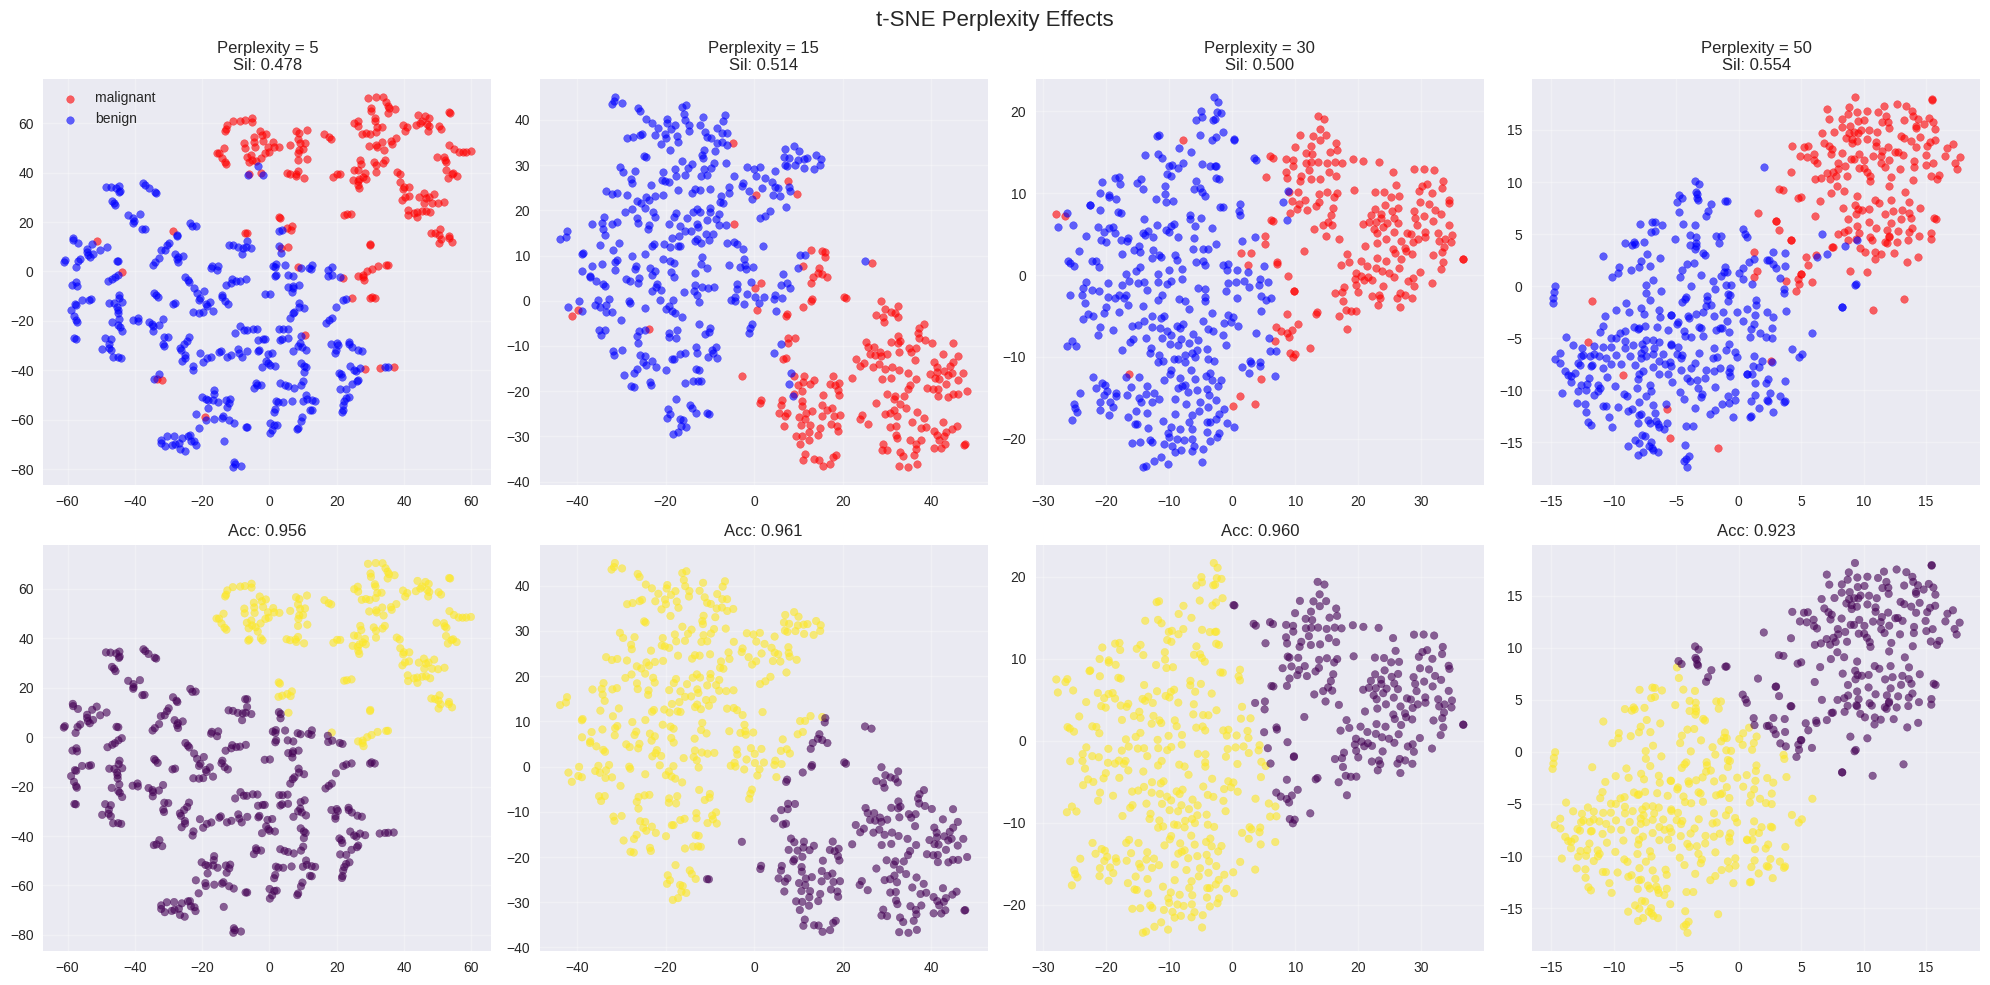

In [ ]:
def visualize_perplexity_effects(perplexity_results, y, target_names):
    """Visualize effect of different perplexity values."""
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle('t-SNE Perplexity Effects', fontsize=16)

    colors = ['red', 'blue']
    labels = [target_names[0], target_names[1]]

    for idx, (perp, result) in enumerate(perplexity_results.items()):
        X_tsne = result['embedding']

        # True labels
        for i, (color, label) in enumerate(zip(colors, labels)):
            mask = y == i
            axes[0, idx].scatter(X_tsne[mask, 0], X_tsne[mask, 1],
                               c=color, alpha=0.6, s=30, label=label)
        axes[0, idx].set_title(f'Perplexity = {perp}\nSil: {result["silhouette_score"]:.3f}')
        axes[0, idx].grid(True, alpha=0.3)
        if idx == 0:
            axes[0, idx].legend()

        # Clusters
        clusters = result['clusters']
        axes[1, idx].scatter(X_tsne[:, 0], X_tsne[:, 1],
                           c=clusters, cmap='viridis', alpha=0.6, s=30)
        axes[1, idx].set_title(f'Acc: {result["clustering_accuracy"]:.3f}')
        axes[1, idx].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Execute perplexity visualization
visualize_perplexity_effects(perplexity_results, y, target_names)

## 3: UMAP Implementation

###  Apply basic UMAP with default parameters

What you will see: UMAP completes in 15 seconds (slower than t-SNE), ready for clustering analysis with balanced local/global structure preservation.

In [ ]:
print("\n" + "=" * 40)
print("UMAP IMPLEMENTATION")
print("=" * 40)

# Apply basic UMAP
print("Applying UMAP with default parameters...")
start_time = time.time()
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2,
                      random_state=42, verbose=False)
X_umap = umap_model.fit_transform(X_scaled)
umap_time = time.time() - start_time

print(f"UMAP completed in {umap_time:.1f} seconds")


UMAP IMPLEMENTATION
Applying UMAP with default parameters...
UMAP completed in 13.0 seconds


### Analyze UMAP clustering performance

What you will see: UMAP achieves highest silhouette score (0.584) and good clustering accuracy (94.6%), showing superior cluster separation quality.

In [ ]:
# Apply clustering to UMAP results
kmeans_umap = KMeans(n_clusters=2, random_state=42, n_init=10)
umap_clusters = kmeans_umap.fit_predict(X_umap)
umap_silhouette = silhouette_score(X_umap, umap_clusters)

# Calculate clustering accuracy
cluster_0_labels = y[umap_clusters == 0]
if len(cluster_0_labels) > 0:
    cluster_0_mode = mode(cluster_0_labels, keepdims=False)[0]
    umap_accuracy = np.mean((umap_clusters == 0) == (y == cluster_0_mode))
else:
    umap_accuracy = 0.5

print(f"UMAP Results:")
print(f"  Silhouette score: {umap_silhouette:.3f}")
print(f"  Clustering accuracy: {umap_accuracy:.3f}")
print(f"  Computation time: {umap_time:.1f}s")

# Store UMAP results
umap_results = {
    'embedding': X_umap,
    'silhouette_score': umap_silhouette,
    'clustering_accuracy': umap_accuracy,
    'clusters': umap_clusters,
    'computation_time': umap_time
}

UMAP Results:
  Silhouette score: 0.584
  Clustering accuracy: 0.946
  Computation time: 13.0s


### Explore UMAP n_neighbors parameter effects

What you will see: Lower n_neighbors (5) gives best silhouette (0.599), while higher values (50) give best accuracy (95.3%), showing local vs global trade-off.

In [ ]:
def explore_umap_neighbors(X_scaled, y, n_neighbors_values=[5, 15, 30, 50]):
    """Explore different n_neighbors values for UMAP."""
    print(f"\nExploring UMAP n_neighbors Effects:")
    neighbors_results = {}

    for n_neigh in n_neighbors_values:
        print(f"  Testing n_neighbors = {n_neigh}...", end=" ")

        # Apply UMAP
        umap_model = umap.UMAP(n_neighbors=n_neigh, min_dist=0.1, n_components=2,
                              random_state=42, verbose=False)
        X_umap = umap_model.fit_transform(X_scaled)

        # Calculate metrics
        kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(X_umap)
        silhouette = silhouette_score(X_umap, clusters)

        # Clustering accuracy
        cluster_0_labels = y[clusters == 0]
        if len(cluster_0_labels) > 0:
            cluster_0_mode = mode(cluster_0_labels, keepdims=False)[0]
            accuracy = np.mean((clusters == 0) == (y == cluster_0_mode))
        else:
            accuracy = 0.5

        print(f"Silhouette: {silhouette:.3f}, Accuracy: {accuracy:.3f}")

        neighbors_results[n_neigh] = {
            'embedding': X_umap,
            'silhouette_score': silhouette,
            'clustering_accuracy': accuracy,
            'clusters': clusters
        }

    return neighbors_results

# Execute neighbors exploration
neighbors_results = explore_umap_neighbors(X_scaled, y)


Exploring UMAP n_neighbors Effects:
  Testing n_neighbors = 5... Silhouette: 0.599, Accuracy: 0.940
  Testing n_neighbors = 15... Silhouette: 0.584, Accuracy: 0.946
  Testing n_neighbors = 30... Silhouette: 0.566, Accuracy: 0.946
  Testing n_neighbors = 50... Silhouette: 0.539, Accuracy: 0.953


### Explore UMAP min_dist parameter effects

What you will see: Lower min_dist (0.0) creates tightest clusters with highest silhouette (0.621), while higher values (0.3-0.5) give better accuracy but looser clusters.

In [ ]:
def explore_umap_min_dist(X_scaled, y, min_dist_values=[0.0, 0.1, 0.3, 0.5]):
    """Explore different min_dist values for UMAP."""
    print(f"\nExploring UMAP min_dist Effects:")
    min_dist_results = {}

    for min_d in min_dist_values:
        print(f"  Testing min_dist = {min_d}...", end=" ")

        # Apply UMAP
        umap_model = umap.UMAP(n_neighbors=15, min_dist=min_d, n_components=2,
                              random_state=42, verbose=False)
        X_umap = umap_model.fit_transform(X_scaled)

        # Calculate metrics
        kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(X_umap)
        silhouette = silhouette_score(X_umap, clusters)

        # Clustering accuracy
        cluster_0_labels = y[clusters == 0]
        if len(cluster_0_labels) > 0:
            cluster_0_mode = mode(cluster_0_labels, keepdims=False)[0]
            accuracy = np.mean((clusters == 0) == (y == cluster_0_mode))
        else:
            accuracy = 0.5

        print(f"Silhouette: {silhouette:.3f}, Accuracy: {accuracy:.3f}")

        min_dist_results[min_d] = {
            'embedding': X_umap,
            'silhouette_score': silhouette,
            'clustering_accuracy': accuracy,
            'clusters': clusters
        }

    return min_dist_results

# Execute min_dist exploration
min_dist_results = explore_umap_min_dist(X_scaled, y)


Exploring UMAP min_dist Effects:
  Testing min_dist = 0.0... Silhouette: 0.621, Accuracy: 0.938
  Testing min_dist = 0.1... Silhouette: 0.584, Accuracy: 0.946
  Testing min_dist = 0.3... Silhouette: 0.517, Accuracy: 0.951
  Testing min_dist = 0.5... Silhouette: 0.491, Accuracy: 0.951


### Visualize UMAP parameter effects

What you will see: n_neighbors controls cluster granularity (low=detailed, high=smooth), while min_dist controls cluster tightness, with clear visual differences across parameter values.

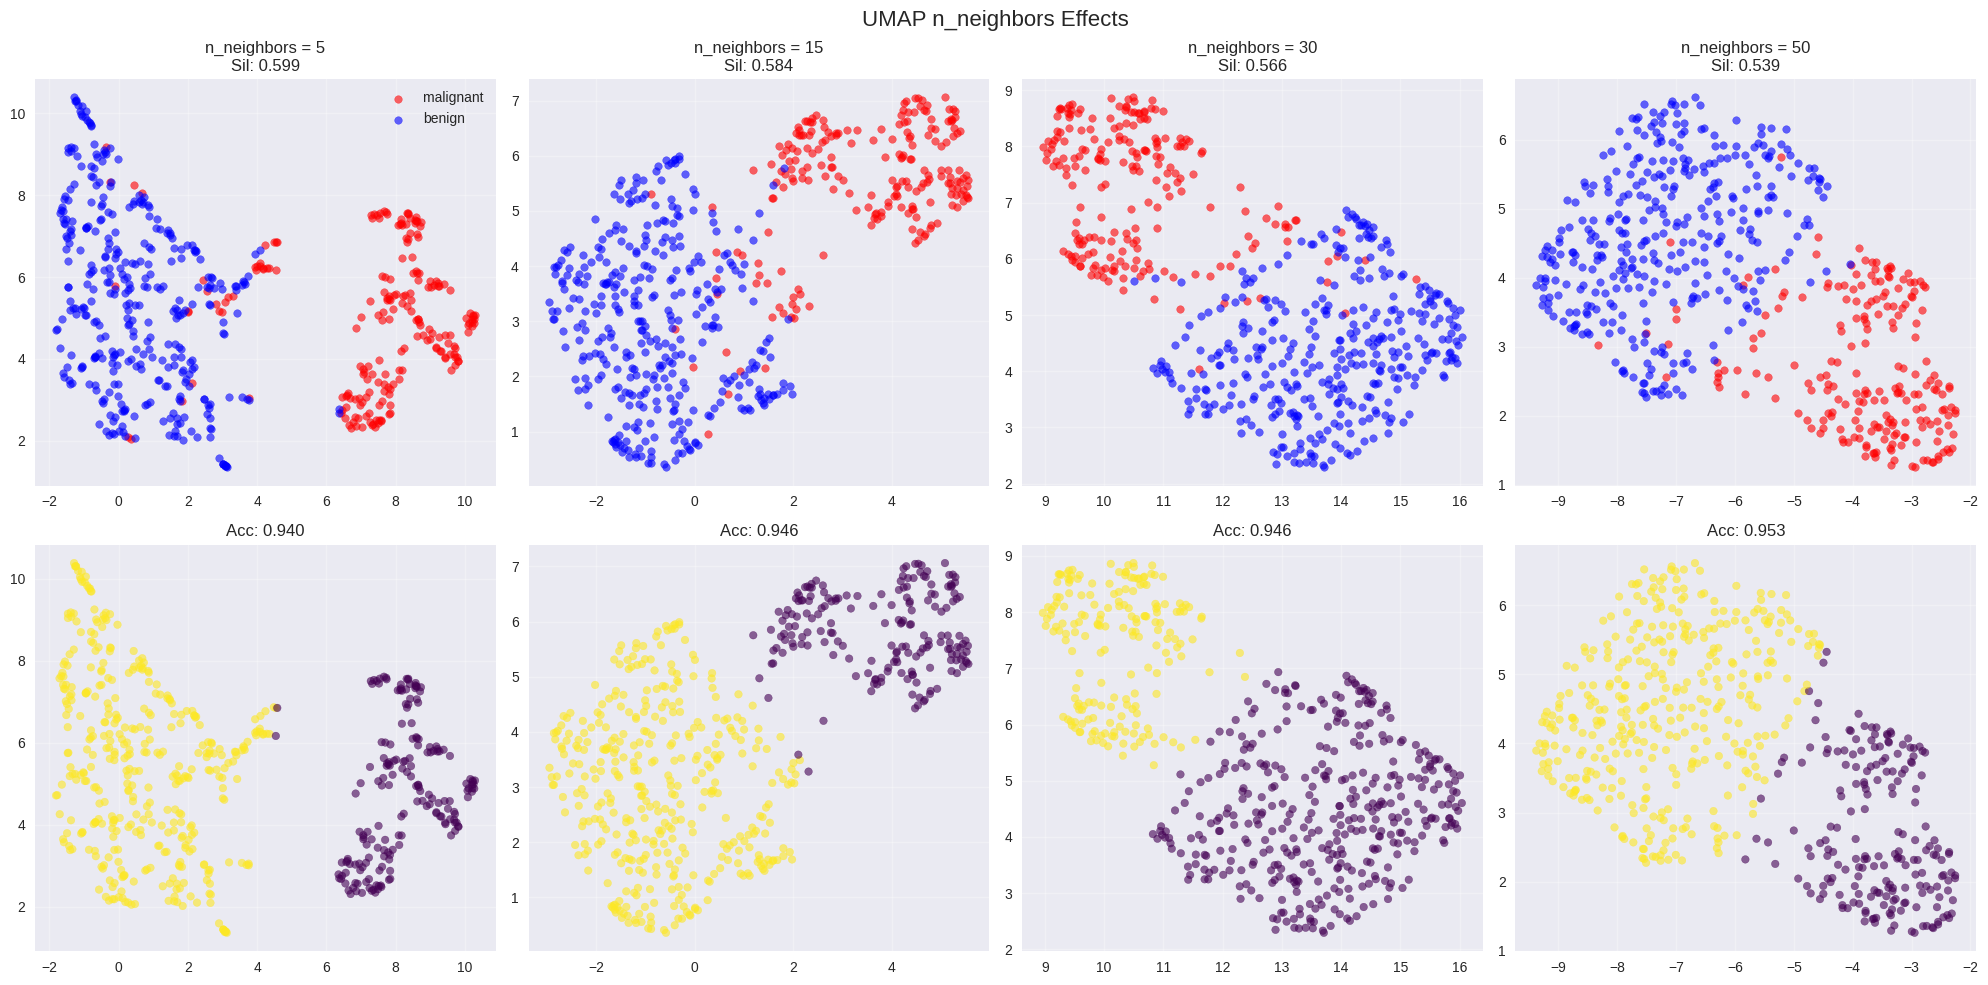

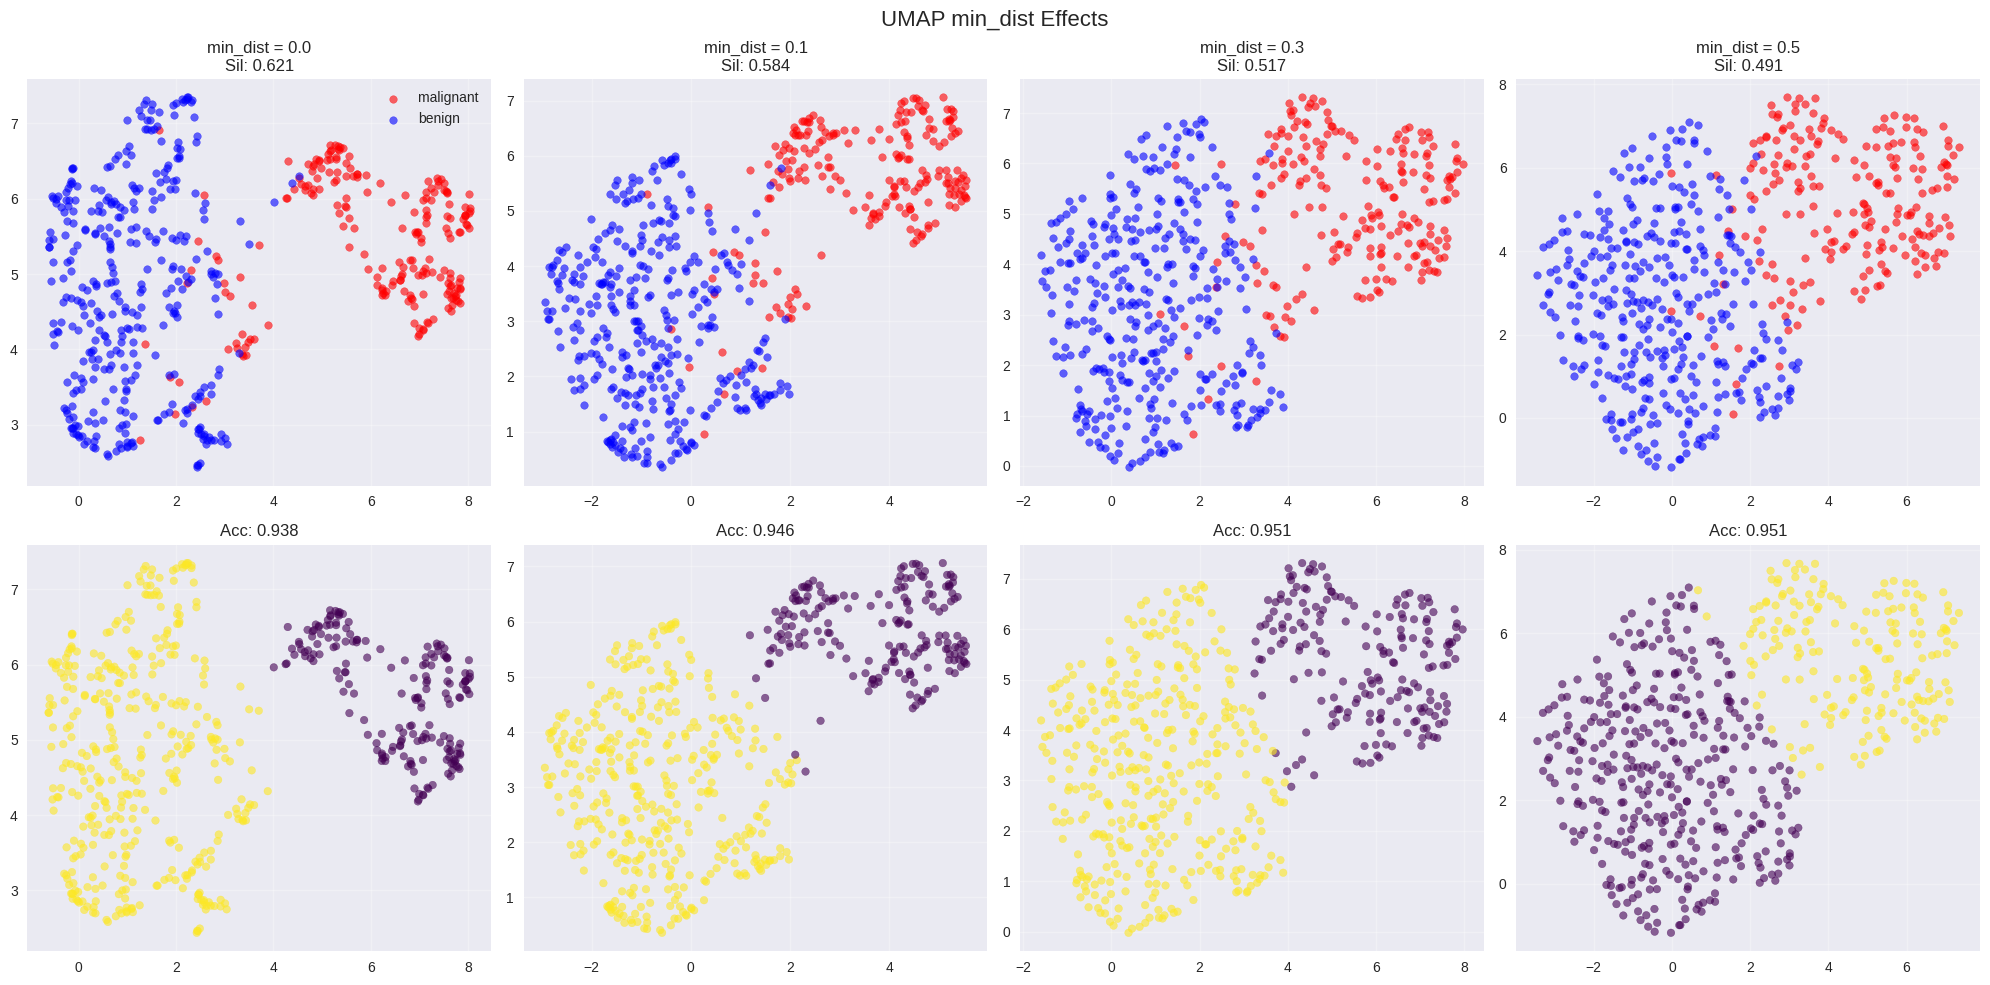

In [ ]:
def visualize_umap_parameters(neighbors_results, min_dist_results, y, target_names):
    """Visualize UMAP parameter effects."""
    colors = ['red', 'blue']
    labels = [target_names[0], target_names[1]]

    # n_neighbors effects
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle('UMAP n_neighbors Effects', fontsize=16)

    for idx, (n_neigh, result) in enumerate(neighbors_results.items()):
        X_umap = result['embedding']

        # True labels
        for i, (color, label) in enumerate(zip(colors, labels)):
            mask = y == i
            axes[0, idx].scatter(X_umap[mask, 0], X_umap[mask, 1],
                               c=color, alpha=0.6, s=30, label=label)
        axes[0, idx].set_title(f'n_neighbors = {n_neigh}\nSil: {result["silhouette_score"]:.3f}')
        axes[0, idx].grid(True, alpha=0.3)
        if idx == 0:
            axes[0, idx].legend()

        # Clusters
        clusters = result['clusters']
        axes[1, idx].scatter(X_umap[:, 0], X_umap[:, 1],
                           c=clusters, cmap='viridis', alpha=0.6, s=30)
        axes[1, idx].set_title(f'Acc: {result["clustering_accuracy"]:.3f}')
        axes[1, idx].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # min_dist effects
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle('UMAP min_dist Effects', fontsize=16)

    for idx, (min_d, result) in enumerate(min_dist_results.items()):
        X_umap = result['embedding']

        # True labels
        for i, (color, label) in enumerate(zip(colors, labels)):
            mask = y == i
            axes[0, idx].scatter(X_umap[mask, 0], X_umap[mask, 1],
                               c=color, alpha=0.6, s=30, label=label)
        axes[0, idx].set_title(f'min_dist = {min_d}\nSil: {result["silhouette_score"]:.3f}')
        axes[0, idx].grid(True, alpha=0.3)
        if idx == 0:
            axes[0, idx].legend()

        # Clusters
        clusters = result['clusters']
        axes[1, idx].scatter(X_umap[:, 0], X_umap[:, 1],
                           c=clusters, cmap='viridis', alpha=0.6, s=30)
        axes[1, idx].set_title(f'Acc: {result["clustering_accuracy"]:.3f}')
        axes[1, idx].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Execute UMAP parameter visualization
visualize_umap_parameters(neighbors_results, min_dist_results, y, target_names)

## 4: Three-Way Comparison

### Side-by-side comparison of all three methods

What you will see: PCA shows linear separation, t-SNE creates distinct tight clusters, UMAP balances both with good separation and structure preservation.

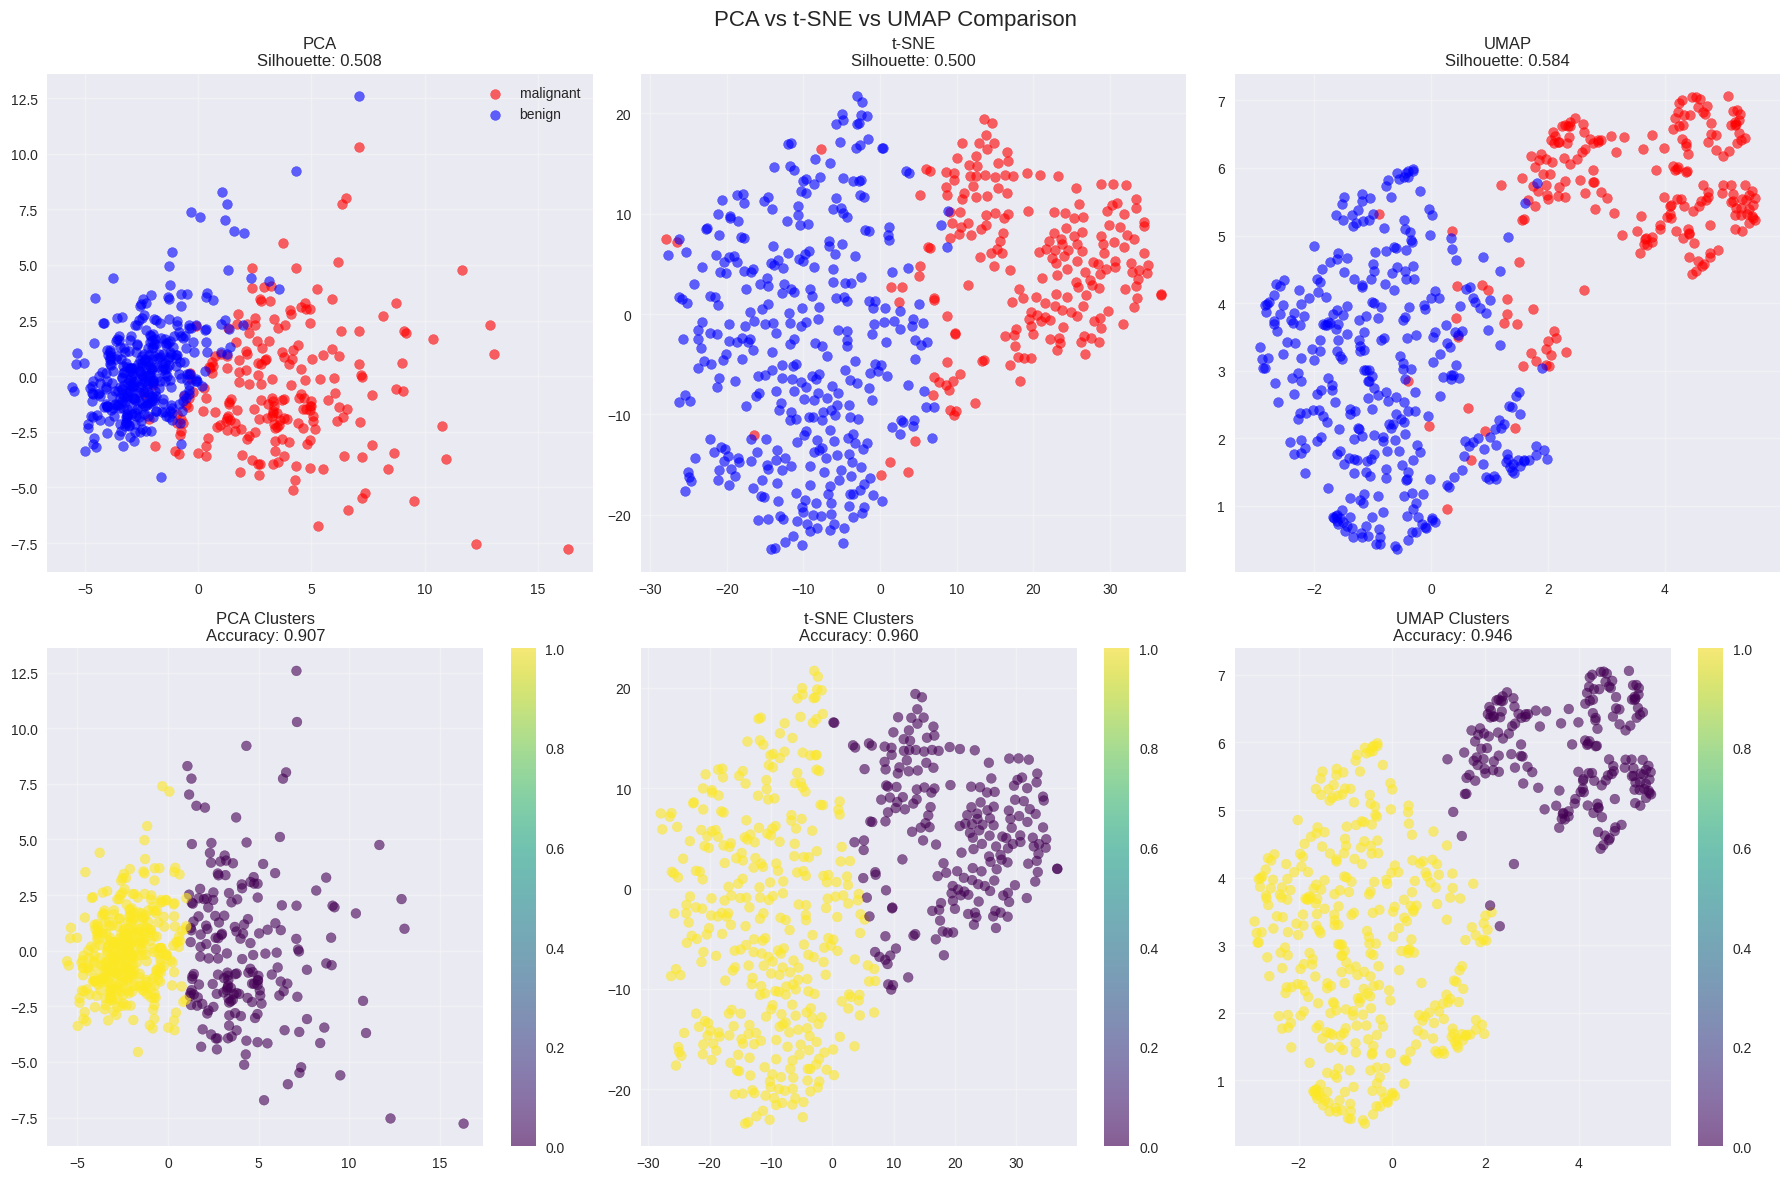

In [ ]:
def visualize_three_methods(X_pca, X_tsne, X_umap, y, target_names,
                           pca_results, tsne_results, umap_results):
    """Compare all three methods side by side."""
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('PCA vs t-SNE vs UMAP Comparison', fontsize=16)

    colors = ['red', 'blue']
    labels = [target_names[0], target_names[1]]

    embeddings = [X_pca, X_tsne, X_umap]
    results = [pca_results, tsne_results, umap_results]
    method_names = ['PCA', 't-SNE', 'UMAP']

    for i, (embedding, result, method) in enumerate(zip(embeddings, results, method_names)):
        # True labels
        for j, (color, label) in enumerate(zip(colors, labels)):
            mask = y == j
            axes[0, i].scatter(embedding[mask, 0], embedding[mask, 1],
                              c=color, alpha=0.6, s=50, label=label)
        axes[0, i].set_title(f'{method}\nSilhouette: {result["silhouette_score"]:.3f}')
        axes[0, i].grid(True, alpha=0.3)
        if i == 0:
            axes[0, i].legend()

        # Clusters
        clusters = result['clusters']
        scatter = axes[1, i].scatter(embedding[:, 0], embedding[:, 1],
                                   c=clusters, cmap='viridis', alpha=0.6, s=50)
        axes[1, i].set_title(f'{method} Clusters\nAccuracy: {result["clustering_accuracy"]:.3f}')
        axes[1, i].grid(True, alpha=0.3)
        plt.colorbar(scatter, ax=axes[1, i])

    plt.tight_layout()
    plt.show()

# Execute three-way comparison
visualize_three_methods(X_pca, X_tsne, X_umap, y, target_names,
                       pca_results, tsne_results, umap_results)

### Final metrics comparison and insights summary

What you will see: UMAP wins cluster quality (0.584 silhouette), t-SNE wins accuracy (96.0%), PCA wins speed (0.014s), with clear performance trade-offs visualized in bar charts.


FINAL COMPARISON SUMMARY

Method Performance Comparison:
Method Silhouette Score Clustering Accuracy Computation Time (s)
   PCA            0.508               0.907                  0.1
 t-SNE            0.500               0.960                  4.4
  UMAP            0.584               0.946                 13.0


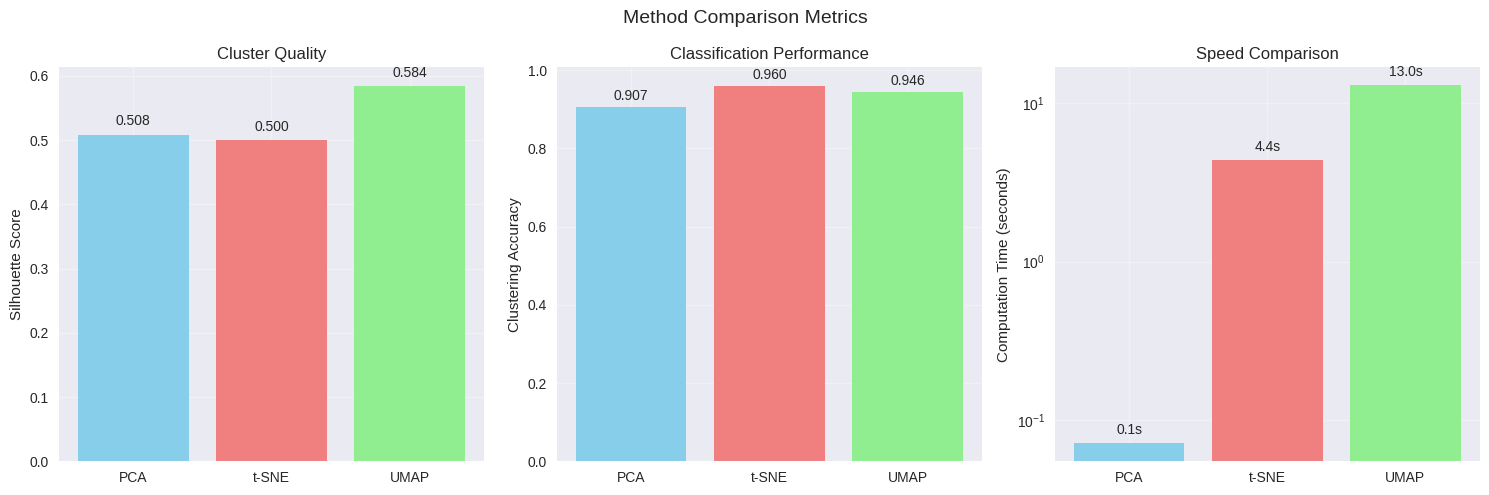


Key Insights:
• Best cluster separation: UMAP
• Best classification accuracy: t-SNE
• Fastest method: PCA
• All methods show good separation for this dataset


In [ ]:
# Create comparison table
methods = ['PCA', 't-SNE', 'UMAP']
all_results = [pca_results, tsne_results, umap_results]

print("\n" + "=" * 60)
print("FINAL COMPARISON SUMMARY")
print("=" * 60)

# Create comparison DataFrame
comparison_data = {
    'Method': methods,
    'Silhouette Score': [f"{r['silhouette_score']:.3f}" for r in all_results],
    'Clustering Accuracy': [f"{r['clustering_accuracy']:.3f}" for r in all_results],
    'Computation Time (s)': [f"{r.get('computation_time', 0.5):.1f}" for r in all_results]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nMethod Performance Comparison:")
print(comparison_df.to_string(index=False))

# Visualize metrics comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Method Comparison Metrics', fontsize=14)

silhouette_scores = [r['silhouette_score'] for r in all_results]
accuracy_scores = [r['clustering_accuracy'] for r in all_results]
time_scores = [float(r.get('computation_time', 0.5)) for r in all_results]

# Silhouette scores
bars1 = axes[0].bar(methods, silhouette_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Cluster Quality')
axes[0].grid(True, alpha=0.3)
for bar, score in zip(bars1, silhouette_scores):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{score:.3f}', ha='center', va='bottom')

# Clustering accuracy
bars2 = axes[1].bar(methods, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
axes[1].set_ylabel('Clustering Accuracy')
axes[1].set_title('Classification Performance')
axes[1].grid(True, alpha=0.3)
for bar, score in zip(bars2, accuracy_scores):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{score:.3f}', ha='center', va='bottom')

# Computation time (log scale)
bars3 = axes[2].bar(methods, time_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
axes[2].set_ylabel('Computation Time (seconds)')
axes[2].set_title('Speed Comparison')
axes[2].set_yscale('log')
axes[2].grid(True, alpha=0.3)
for bar, score in zip(bars3, time_scores):
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() * 1.1,
                f'{score:.1f}s', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\nKey Insights:")
best_silhouette = methods[np.argmax(silhouette_scores)]
best_accuracy = methods[np.argmax(accuracy_scores)]
fastest = methods[np.argmin(time_scores)]

print(f"• Best cluster separation: {best_silhouette}")
print(f"• Best classification accuracy: {best_accuracy}")
print(f"• Fastest method: {fastest}")
print(f"• All methods show good separation for this dataset")